In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from dateutil.relativedelta import relativedelta
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#Test to see the data
#engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()
#last_date = engine.execute('SELECT date FROM Measurement order by date asc LIMIT 1').fetchall()

# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

#Unpacking the lastdate so it does not have the () around it
last_date = datetime.strptime(str(last_date[0]), "%Y-%m-%d")

last_date
#str(last_date)


datetime.datetime(2017, 8, 23, 0, 0)

In [11]:
#print(type(last_date))
#query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date = last_date - dt.timedelta(days=365)
query_date

datetime.datetime(2016, 8, 23, 0, 0)

In [82]:

# Perform a query to retrieve the data and precipitation scores
#tw_month_measure = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date)\
#.filter(Measurement.prcp != 'none').filter(Measurement.prcp > 0).all()

tw_month_measure = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()

#tw_month_measure

In [83]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_prec = pd.DataFrame(tw_month_measure, columns=['date', 'precipitation'])
df_prec.set_index('date', inplace=True)
# Sort the dataframe by date
#df.sort_values(by=['Brand'], inplace=True, ascending=False)
df_prec = df_prec.sort_values(by='date', ascending=False)

df_sum = df_prec.groupby('date').sum()
df_prec.head()

,precipitation
date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.00


Text(0, 0.5, 'Percipitation')

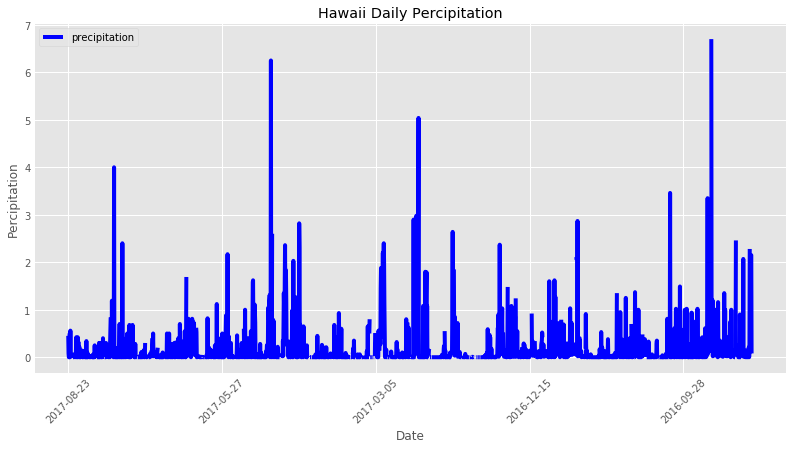

In [86]:
#rotate the date and outline the size
axis = df_prec.plot(rot=45, figsize=(12,6), color="b");
#Labels for the graph
axis.set_title("Hawaii Daily Percipitation")
axis.set_xlabel("Date")
axis.set_ylabel("Percipitation")



In [87]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df_prec.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![precipitation](Images/precipitation.png)

In [88]:
#Inspect the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [89]:

# Using the inspector to print the column names within the 'Station' table and its types
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [90]:

# Using the inspector to print the column names within the 'Measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [91]:
#Check what is in the table
engine.execute('SELECT * FROM Station LIMIT 20').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [145]:
#Check what is in the table
engine.execute('SELECT * FROM measurement LIMIT 20').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0)]

![describe](Images/describe.png)

In [93]:
# Design a query to show how many stations are available in this dataset?
number_of_stations = session.query(Measurement.station).distinct().count()
number_of_stations

9

In [94]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#session.query(Station.id).count().group_by(Station.name)
#session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(Measurement.station.desc()).all()
session.query(Measurement.station, func.count(Measurement.station))\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [95]:
most_active_station = session.query(Measurement.station)\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()

#Unpack the field without ()
most_active_station = most_active_station[0]

In [188]:
#identify all the different measurements from the tobs
station_cal = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
top_stats = session.query(*station_cal).filter(Measurement.station == most_active_station).group_by(Measurement.station).all()

top_stats


[(54.0, 85.0, 71.66378066378067)]

In [182]:
columns = inspector.get_columns('top_stats')
for column in columns:
    print(column["name"], column["type"])

In [97]:
high_tobs = session.query(Measurement.station)\
.group_by(Measurement.tobs).order_by(func.count(Measurement.station).desc()).first()
high_tobs = high_tobs[0]
high_tobs

'USC00519397'

In [98]:
# Choose the station with the highest number of temperature observations.
results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= query_date)\
.filter(Measurement.station == high_tobs).all()
#results

In [99]:
rows = len(results)
rows 

360

In [101]:
# Unpack the `from results and save into separate lists
tobs_info = [result[1] for result in results[:rows]]
#tobs_info


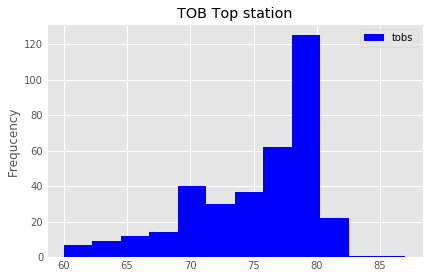

In [102]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(tobs_info, rwidth=10, bins = 12, color='b', label='tobs')


plt.legend(loc = 'upper right')

#plt.xlabel('bar number')
plt.ylabel('Frequcency')
plt.title('TOB Top station')
plt.style.use('ggplot')
plt.show()

![precipitation](Images/station-histogram.png)

In [103]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [106]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps_unpack = calc_temps('2012-02-28', '2012-03-05')[0]
calc_temps_unpack

(62.0, 69.57142857142857, 74.0)

In [127]:
#outline the different information identified
min_tobs = calc_temps_unpack[0]
avg_tobs = calc_temps_unpack[1]
max_tobs = calc_temps_unpack[2]

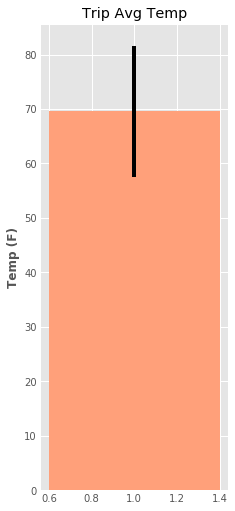

In [138]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.figure(figsize=(3,8))                                                    # plots data
plt.bar(1, avg_tobs, yerr=(max_tobs - min_tobs), color='lightsalmon')
plt.ylabel("Temp (F)", weight="bold")
plt.title('Trip Avg Temp')
plt.show()


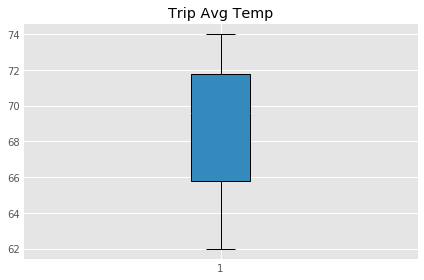

In [129]:
#Like this view better to understand the data set
fig, ax = plt.subplots()

#x = range(len(calc_temps_unpack))
ax.boxplot(calc_temps_unpack, patch_artist=True)
ax.set_title('Trip Avg Temp')
fig.tight_layout()
plt.show()

In [163]:
#Testing with execute
engine.execute('SELECT a.station, b.name, b.latitude, b.longitude, b.elevation, sum(a.prcp) FROM measurement a left join station b on a.station = b.station group by a.station').fetchall()



[('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 92.68000000000006),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 382.61999999999847),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 234.49000000000026),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 1068.0899999999956),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 43.44000000000002),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 70.87000000000005),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 588.6399999999976),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 131.62000000000063),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 295.67999999999944)]

In [176]:
#testing with session
start_date = '2012-02-28'
end_date = '2012-03-05'
session.query(Measurement.station, Station.name, Station.latitude, Station.longitude,Station.elevation, \
              func.sum(Measurement.prcp))\
            .filter(Measurement.station == Station.station)\
            .filter(Measurement.date >= start_date).filter(Measurement.date <= end_date)\
            .group_by(Measurement.station.desc()).all()
#\
#        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

[('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  0.76),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 5.79),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.03),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  10.32),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0),
 ('USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6,
  3.8400000000000003),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  11.08),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  1.1800000000000002),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  2.92)]

In [180]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def rainfall(start_date, end_date):
    """Rainfall for month and what precipitation, station, name, latitude, longitude, and elevation.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        Measurement.station, Station.name, Station.latitude, Station.longitude,Station.elevation, sum of Measurement.prcp
    """
    
    return session.query(Measurement.station, Station.name, Station.latitude, Station.longitude,Station.elevation, \
              func.sum(Measurement.prcp))\
            .filter(Measurement.station == Station.station)\
            .filter(Measurement.date >= start_date).filter(Measurement.date <= end_date)\
            .group_by(Measurement.station)\
            .order_by(func.sum(Measurement.prcp).desc()).all()

# function with dates
print(rainfall('2012-02-28', '2012-03-05'))

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 11.08), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 10.32), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 5.79), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 3.8400000000000003), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 2.92), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 1.1800000000000002), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.76), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.03), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


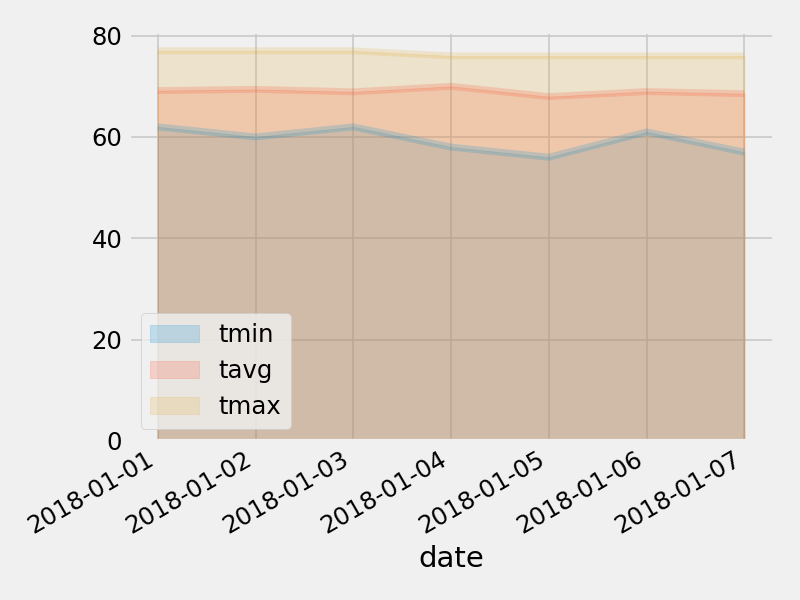

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
